# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
import pandas as pd

bos = pd.read_csv('boston.csv')
print(bos.shape)
bos.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's rename the target variable of `MEDV` to `PRICE` which will contain the prices. 

In [3]:
bos = bos.rename(columns={"MEDV":"PRICE"})
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [4]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

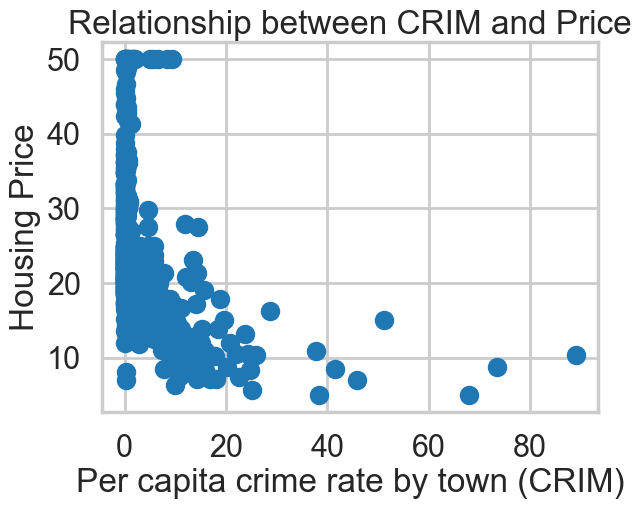

In [5]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [ ]:
# your turn: describe relationship
There are multiple variables in the dataset.  For example, the relationship between MEDV (median value of owner-occupied homes) and other variables like RM (average number or rooms) tends to be positive, but LSTAT (percentage of lower status of the population) tends to be negative.  Some relationships appear roughly linear such as MEDV vs RM while others show non-linear patters such as MEDV vs LSTAT, which might have more of a curved relationship.  It is interesting that the dataset has a mix of continuous and binary variables (CHAS is binary).  On the other hand, some variables have  a wide range of values like TAX (full-value property tax rate).  As for outliers, there are potential outliers in several variables.  For instance, some extremely high values in the MEDV column could present luxury properties.  The B variable has some very low values standing out, and CRIM has high values.

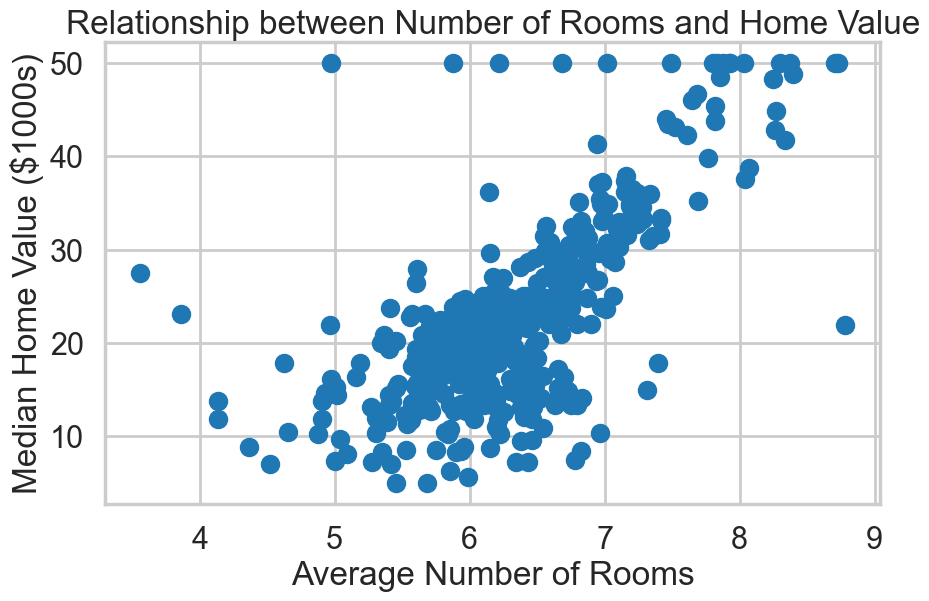

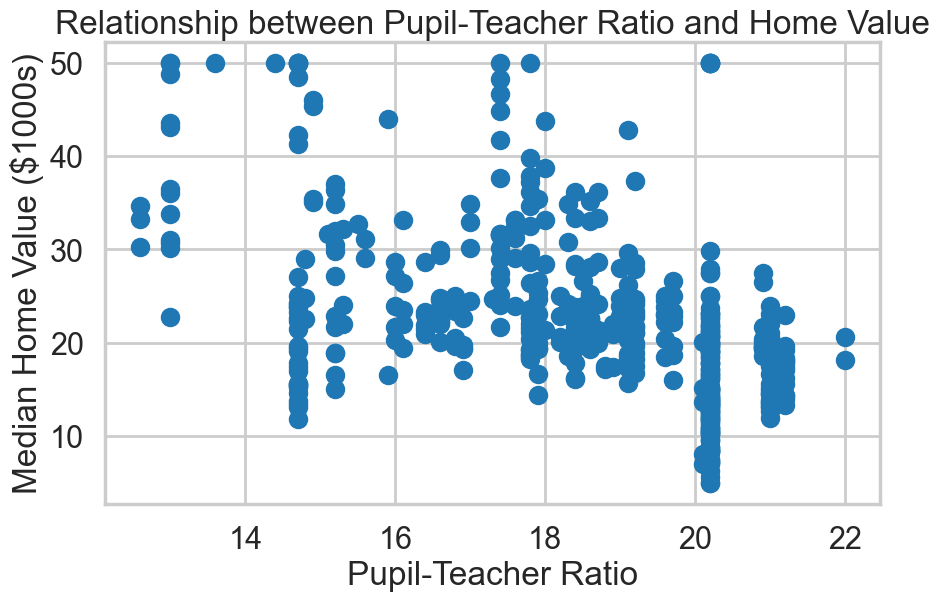

In [7]:
# your turn: scatter plot between *RM* and *PRICE*
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('boston.csv')

# Create scatter plot for RM vs PRICE
plt.figure(figsize=(10, 6))
plt.scatter(data['RM'], data['MEDV'])
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Home Value ($1000s)')
plt.title('Relationship between Number of Rooms and Home Value')
plt.show()

# Create scatter plot for PTRATIO vs PRICE
plt.figure(figsize=(10, 6))
plt.scatter(data['PTRATIO'], data['MEDV'])
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Median Home Value ($1000s)')
plt.title('Relationship between Pupil-Teacher Ratio and Home Value')
plt.show()

1) Average Number of Rooms vs. Home Value:  There is a clear positive relationship.  As the number of rooms increases, the home value tends to increase as well, which makes sense since larger homes with more rooms are in general more pricey.  The relationship appears to be pretty linear but with some spread in the data points.  Homes with around six to seven rooms cluster around $20-30k, and homes with eight or more rooms often exceed $40k.

2) Pupil-Teacher Ratio vs. Home Value:  This plot shows a negative relationship., which could indicate that areas with lower pupil-teacher ratios tend to have higher property values.  The relationship is not as clear or strong as the rooms-to-value relationship.  The highest home values in general are associated with pupil-teacher ratios below twenty, and ratios above twenty are associated with a wider range of home values mostly located on the lower end.

Both plots tell us a story about factors influencing Boston's home values, suggesting both home size and local school quality play roles in property value determination.  This kind of information may be valuable for sellers, homebuyers, and policymakers to understand Boston housing market dynamics more deeply.

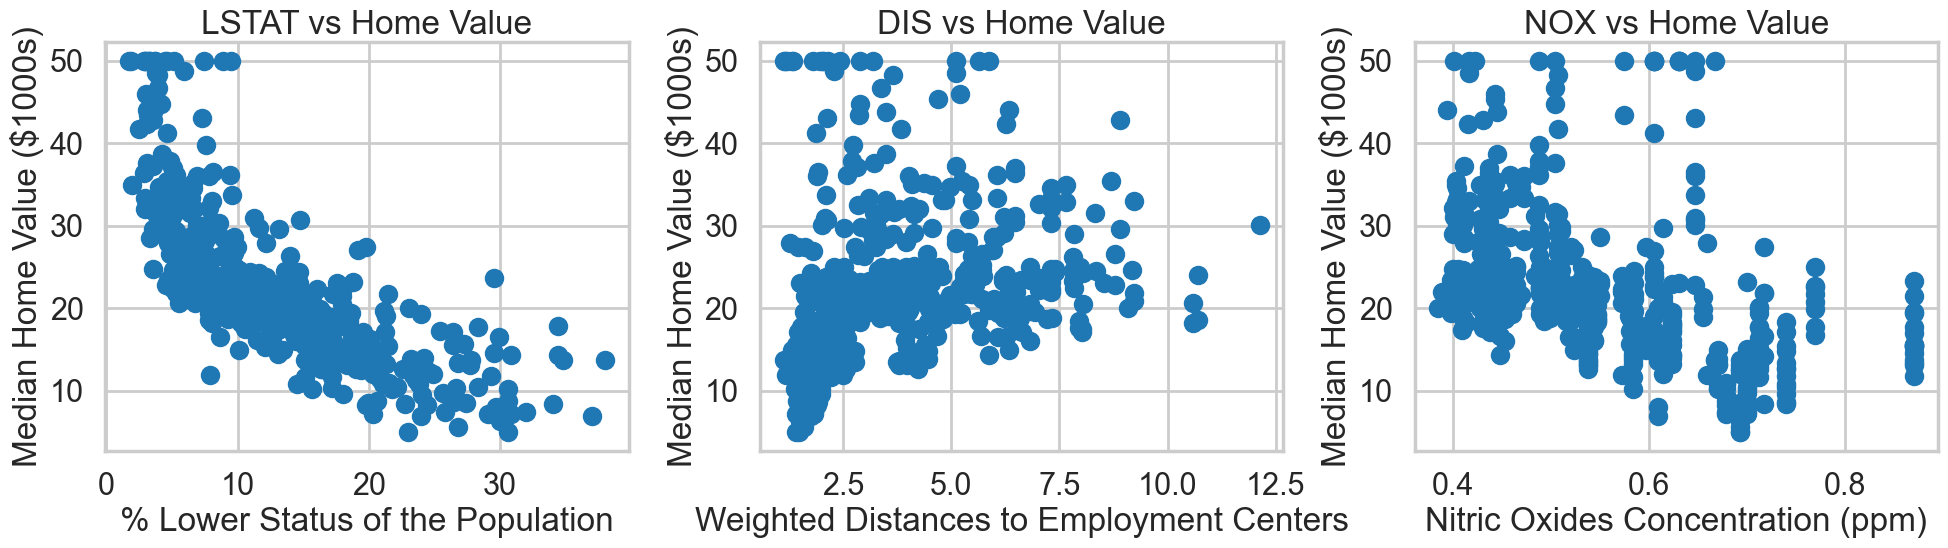

In [16]:
import matplotlib.pyplot as plt

data = pd.read_csv('boston.csv')

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].scatter(data['LSTAT'], data['MEDV'])
axs[0].set_xlabel('% Lower Status of the Population')
axs[0].set_ylabel('Median Home Value ($1000s)')
axs[0].set_title('LSTAT vs Home Value')

axs[1].scatter(data['DIS'], data['MEDV'])
axs[1].set_xlabel('Weighted Distances to Employment Centers')
axs[1].set_ylabel('Median Home Value ($1000s)')
axs[1].set_title('DIS vs Home Value')

axs[2].scatter(data['NOX'], data['MEDV'])
axs[2].set_xlabel('Nitric Oxides Concentration (ppm)')
axs[2].set_ylabel('Median Home Value ($1000s)')
axs[2].set_title('NOX vs Home Value')

plt.tight_layout()
plt.show()


1) LSTAT vs. Home Value:  This plot shows a clear negative relationship between the percentage of lower status population and home values.  As LSTAT increases, home values tend to decrease, which suggest areas with higher percentage of lower status population generally have lower property values.  The relationship appears to be non-linear and has a steep decline in home values at the lower LSTAT values.
2) DID vs. Home Values:  This plot has a positive relationship between distance to employment centers and home values.  However, it is not as strong as the LSTAT relationship.  As distance increases, home value tends to increase slightly.  This could indicate that more distant areas have higher property values maybe due to larger properties or better living conditions outside of Boston city's centre.  
3) NOX vs. Home Value:  There is a negative relationship between nitric oxides concentration and home value.  As NOX levels increase, home values decrease.  Areas with higher air pollution therefore have lower property values.  This is a nonlinear relationship with a shard decline in home values as NOX levels initially increase then a more gradual decline at higher NOX levels.
These three plots give information on how environmental and socioeconomic factors relate to Boston's housing prices and suggest socioeconomicc status of an area has strong influence on the value of properties.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<Axes: xlabel='RM', ylabel='PRICE'>

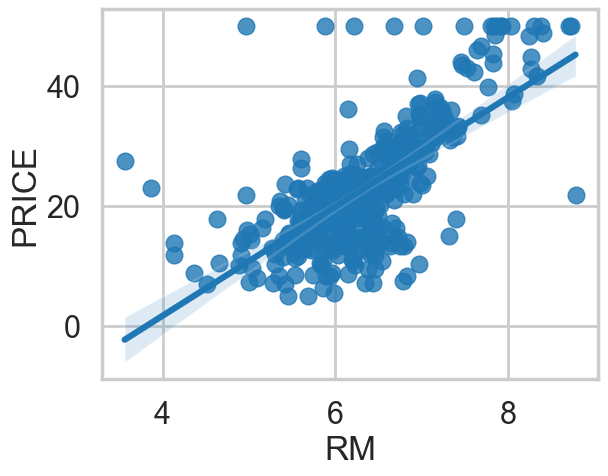

In [18]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


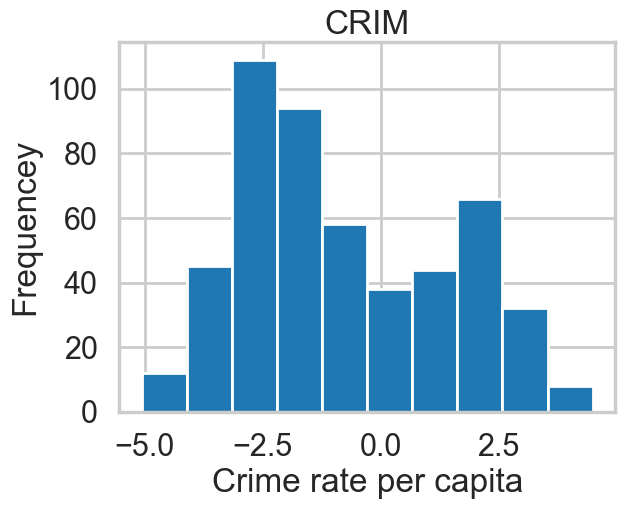

In [19]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

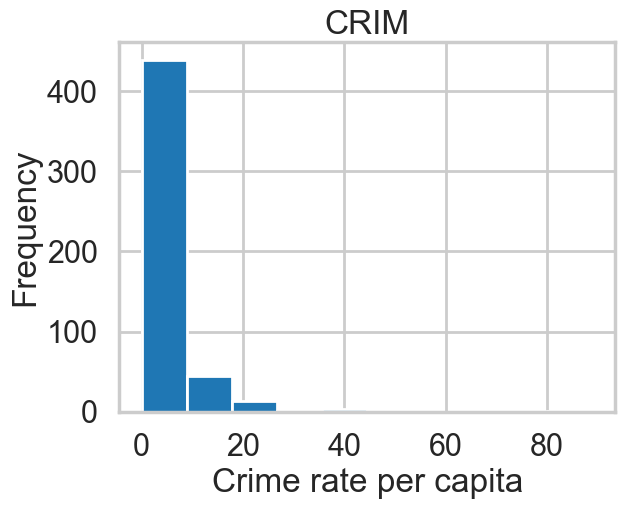

In [20]:
bos = pd.read_csv('boston.csv')

plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

The purpose of taking the logarithm of the crime rate per capita was to address the skewness in the data distribution.  By applying the log transformation, it compresses the scale of very large values while spreading out smaller values.  This makes the distribution more symmetric and easier to analyze/visualise.  Moreover, it helps to normalise the data, which can be beneficial for many statistical analyses and ML algorithms.  Lastly, it helps in better understanding the data distribution, particularly when there are extreme values or outliers.  If there is no log transformation, the CRIM variable has a highly right-skewed distribution.  There are many neighborhoods with low crime rates and a few neighborhoods with extremely high crime rates.  This skewness isn't as obvious in the log-transformed version.  The log transformation reveals that there is a more continuous and gradual distribution of crime rates across neighborhoods, which might not be apparent from just raw data.  It also highlights that the differences between low-crime areas are potentially more informative than they appear in untransformed data.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [21]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [23]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
import pandas as pd
from statsmodels.formula.api import ols

# Load the data
bos = pd.read_csv('boston.csv')

# Fit the model
m = ols('MEDV ~ RM', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           2.49e-74
Time:                        12:36:31   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

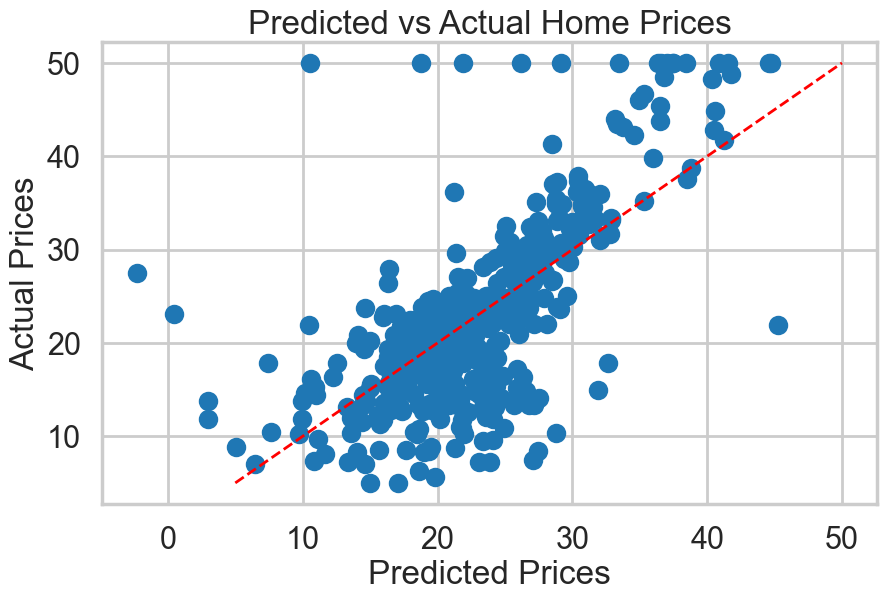

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(m.fittedvalues, bos['MEDV'])
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Predicted vs Actual Home Prices')
plt.plot([bos['MEDV'].min(), bos['MEDV'].max()], [bos['MEDV'].min(), bos['MEDV'].max()], 'r--', lw=2)
plt.show()

There is an overall trend of clear positive correlation between predicted and actual prices.  The red dashed line represents perfect predictions, so points close to this line indicate accurate predictions.  The points show some spread around the diagonal line, which indicate the model's predictions are not perfect but capture the general trend.  The model seems to underestimate prices for more expensive homes, which is evident from seeing the points above the diagonal line at higher prices.  There is an overestimation of low values for less expensive homes.  There is a denser cluster of points in mid-price range.  The model thus performs better for average-priced homes.  At higher actual prices, a few points significantly deviate from the diagonal.  These could represent potential dataset outliers.

### Fitting Linear Regression using `sklearn`


In [26]:
from sklearn.linear_model import LinearRegression

# Drop 'MEDV' instead of 'PRICE' as it's the target variable in the Boston dataset
X = bos.drop('MEDV', axis=1)

# Create a LinearRegression object
lm = LinearRegression()

# The LinearRegression object is now ready to use
print(lm)

LinearRegression()


#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [28]:
y = bos['MEDV']
# Fit the model
lm.fit(X, y)
predictions = lm.predict(X)

# Get R-squared score
r_squared = lm.score(X, y)

# Get coefficients and intercept
coefficients = lm.coef_
intercept = lm.intercept_

print("R-squared:", r_squared)
print("Coefficients:", coefficients)
print("Intercept:", intercept)

R-squared: 0.7406426641094095
Coefficients: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Intercept: 36.45948838508985


Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [29]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = bos.drop('MEDV', axis=1)

# Fit the model using all 13 predictors
lm.fit(X, bos.MEDV)

print("Model fitted successfully!")

Model fitted successfully!


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [30]:
lm = LinearRegression(fit_intercept=False) #To change model to not fit an intercept term, set fit_intercept parameter to False when creating the LinearRegression object

I would not recommend removing the intercept term in this case because the intercept allows the model to adjust for the baseline value of the target variable (house prices) when all predictors are 0.  Without the intercept, you are forcing the regression line to pass through the origin, which may not be realistic for housing prices.  Also, removing the intercept can lead to biased coefficient estimates if the true relationship between the predictors and the target doesn't pass through the origin.  In the housing price context, it is unlikely that a house with zero values for all predictors will have an exactly zero housing price.  The intercept helps to capture this baseline value while also improving model fit and interpretability.  

No, it is not enough that the residuals are normally distributed to satisfy assumption that they are i.i.d.  While normal distribution of residuals is often desirable and is part of the assumption for certain statistical tests, it does not guarantee independence or identical distribution.  To satisfy the i.i.d. assumption, the residuals shouldn't show any pattern or correlation with each other or with the predictors.  So knowing one residual should not give information about another residual.  All residuals also should come from the same probability distribution, which does not necessarily have to be normal.  The spead and shape of the residuals should be consistent across all predictor levels.

False.  To use linear regression, the dependent variable (Y) does not need to be normally distributed.  The assumption of normality in linear regression applies to the residuals (errors) and not Y itself.  The central limit theorem suggests for large sample sizes, the sampling distribution of the regression coefficients will be approximately normal regardless of Y distribution.  In addition, linear regression is based on the method of least squares, which does not require Y normality to produce unbiased coefficient estimates.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [34]:
from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model
lm = LinearRegression()
X = bos.drop('MEDV', axis=1)
y = bos['MEDV']
lm.fit(X, y)
print('Estimated intercept coefficient: {:.4f}'.format(lm.intercept_))

Estimated intercept coefficient: 36.4595


In [35]:
print('Estimated intercept coefficient: {:.4f}'.format(lm.intercept_))

Estimated intercept coefficient: 36.4595


In [36]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [37]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [38]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

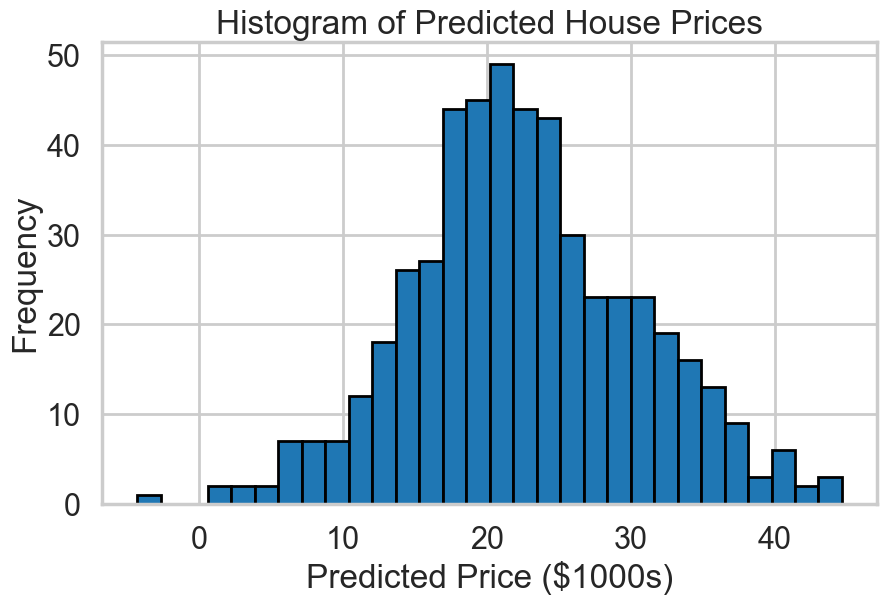

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(lm.predict(X), bins=30, edgecolor='black')
plt.title('Histogram of Predicted House Prices')
plt.xlabel('Predicted Price ($1000s)')
plt.ylabel('Frequency')
plt.show()

The histogram of predicted house prices has a roughly bell shaped distribution with a noticeable right skew, indicating that while most houses cluster around a central price range, there is significant number of higher-priced homes pulling the distribution to the right.  The centre of the distribution appears to be around the $20-25k range for homes in the dataset.  The spread of the distribution is considerable from about $5k to over $40k.  This reflects Boston's diverse housing market nature.  There are some outliers particularly on the high end of the range.  Some extend beyond $40k, and some reach at least $50k and higher.  These outliers could represent luxury properties and/or homes in very desirable locations.  Possible reasons for these outliers could be high-value properties in the dataset, limitationsof the linear model capturing extreme values, and potential errors of features in the data.  In regards to what we should do for the outliers, it would depend on the goal for transformation.  To understand the typical Boston city home, for example, it may be best to focus on the distribution's centre.  On the contrary, to capture the full range of the market, keeping the outliers could be important.  We could consider using robust regression techniques like transforming the target variable and doing log transformation on the features to better handle extreme values.

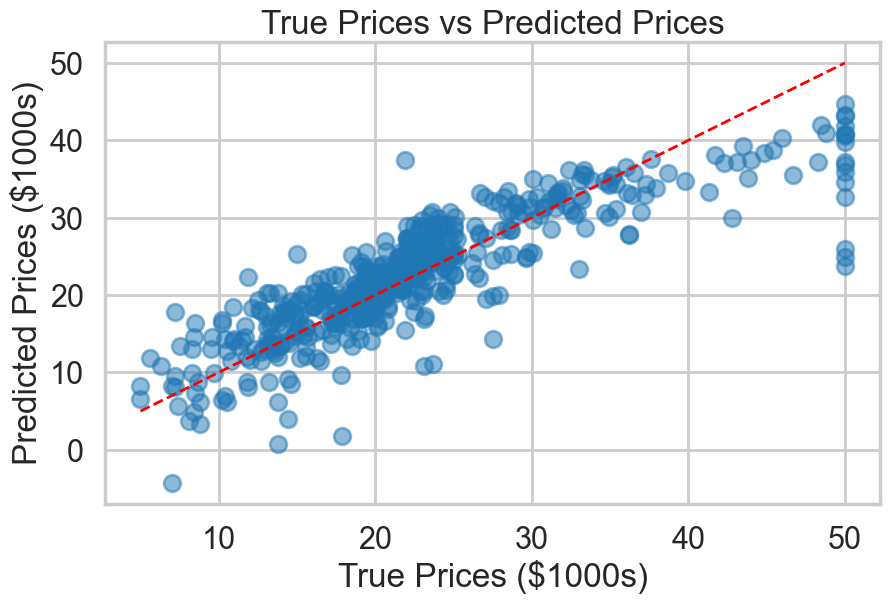

In [40]:
predicted_prices = lm.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(bos['MEDV'], predicted_prices, alpha=0.5)
plt.plot([bos['MEDV'].min(), bos['MEDV'].max()], [bos['MEDV'].min(), bos['MEDV'].max()], 'r--', lw=2)
plt.xlabel('True Prices ($1000s)')
plt.ylabel('Predicted Prices ($1000s)')
plt.title('True Prices vs Predicted Prices')
plt.show()

Advantages of statsmodels:
Provides detailed statistical output, including p-values, confidence intervals, and various diagnostic tests.
Offers a more comprehensive summary of the model, which is particularly useful for statistical inference and hypothesis testing.
Uses R-like formula syntax, which can be intuitive for those familiar with R.

Advantages of scikit-learn:
More consistent API across different types of models, making it easier to switch between different algorithms.
Generally faster for large datasets due to optimized implementations.
Better integration with other machine learning tasks like cross-validation and feature selection.

The key advantage that statsmodels provides, based on the information from both packages is the focus on statistical inference.  Detailed statistical input, including p-values and confidence intervals allow better in -depth analysis of model parameter and significance.  

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [42]:
import numpy as np
print(np.sum((bos.MEDV - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [44]:
print(np.sum((lm.predict(X) - np.mean(bos.MEDV)) ** 2))

31637.510837064765


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [46]:
from statsmodels.formula.api import ols
model = ols('MEDV ~ PTRATIO', data=bos).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           1.61e-34
Time:                        13:22:23   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

The intercept represents the predicted housing price when the pupil-teacher ratio is zero.  In this case, it is likely to be a large positive number, indicating the baseline housing price if there hypothetically were no students per teacher.  Additionally, the coefficient for PTRATIO is likely to be negative, indicating pupil-teacher ratio increases and housing price will tend to decrease.  The coefficient's magnitude tells us how much the price is expected to change for each one-unit increase in the pupil-teacher ratio.

In [47]:
r_squared = model.rsquared
print(f"R^2 value: {r_squared:.4f}")

R^2 value: 0.2578


The R^2 value of 0.2578 provides valuable insight into the relationship between the pupil-teacher ratio (PTRATIO) and housing prices (MEDV) in the Boston dataset.  This value indicates that approximately 25.78% of the housing pricing variance can be explained by the pupil-teacher ratio alone.  This shows a definite relationship between these variables while also suggesting that there are other important factors influencing housing prices that are not captured by this single-variable model.  This moderate R^2 value tells us that the pupil-teacher ratio is indeed a relevant factor in determining housing prices, but it's not the only or even primary driver. 

In [48]:
f_statistic = model.fvalue
print(f"F-statistic: {f_statistic:.4f}")

F-statistic: 175.1055


The F-statistic of 175.1055 is a strong indicator of the model's significance.  This high value tells us that the relationship between the pupil-teacher ratio (PTRATIO) and housing prices (MEDV) is statistically significant.  This F-statistic suggests that the variation explained by the model is substantially greater than the unexplained variation.  It indicates that pupil-teacher ratio is indeed a meaningful predictor of housing prices in the Boston dataset.  

Upon examining the F-statistic and t-statistic for the regression coefficient we can observe a notable relationship because in simple linear regression models, the F-statistic is equal to the square of the t-statistic for the slope coefficient.  This relationship can be expressed mathematically as F=t^2.  This relationship highlights the equivalence of the overall model significance test (F-test) in simple linear regression.  It demonstrates that in a model with only one predictor, testing the significance of the entire model is essentially the same as testing the significance of that single predictor's coefficient.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [49]:
from statsmodels.formula.api import ols
model = ols('MEDV ~ CRIM + RM + PTRATIO', data=bos).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           6.15e-98
Time:                        13:37:47   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

In [50]:
f_statistic = model.fvalue
print(f"F-statistic: {f_statistic:.4f}")

F-statistic: 245.1645


This F-statistic is a strong indicator of the model's overall significance.  This high value tells us that the combination of CRIM, RM, and PTRATIO has substantial predictive power for housing prices (MEDV) in the Boston dataset.  The variation explained by the model using crime rate, avg number of rooms, and pupil-teacher ratio significantly is greater than the unexplained variation.  It allows us to confidently reject the null hypothesis that all regression coefficients are simultaneously zero.  The three variables form a robust predictor set for housing prices.

In [51]:
r_squared = model.rsquared
print(f"R^2 value: {r_squared:.4f}")

R^2 value: 0.5943


The R^2 value here indicates that our model using CRIM, RM, and PTRATIO explains approximately 59.43% of the variance in housing prices (MEDV) in the Boston dataset.  This is a substantial improvement over the single-variable model we examined earlier, which used only PTRATIO and had an R^2 of 0.2578.  It tells us that these three variables together provide  a much more comprehensive explanation of housing price variations.  The chosen variables are relevant and important in understanding housing price dynamics.

Based on the model summary, all three CRIM, RM, and PTRATIO variables are significant in house price prediction.  Our analysis reveals that crime rates, living space, and educational resources play key roles in house price determination.  Crime rates have a negative impact on housing prices.  This highlights the importance of public safety in maintaining property values.  The average number of rooms per dwelling emerges as a strong positive influencer.  And the pupil-teacher ratio in local schools shows a negative relationship with housing prices.  This emphasizes the value homebuyers place on education quality with lower pupil-teacher ratios commanding higher property values.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [52]:
from statsmodels.formula.api import ols
from scipy import stats

# Part 3 Model
model1 = ols('MEDV ~ CRIM + RM + PTRATIO', data=bos).fit()
# New model with additional variables
model2 = ols('MEDV ~ CRIM + RM + PTRATIO + LSTAT + TAX', data=bos).fit()

# Compute F-test
f_statistic = ((model1.ssr - model2.ssr) / (model2.df_model - model1.df_model)) / model2.mse_resid
p_value = 1 - stats.f.cdf(f_statistic, model2.df_model - model1.df_model, model2.df_resid)

print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Compare AIC
print(f"AIC for model1: {model1.aic:.4f}")
print(f"AIC for model2: {model2.aic:.4f}")

# Compare R-squared
print(f"R-squared for model1: {model1.rsquared:.4f}")
print(f"R-squared for model2: {model2.rsquared:.4f}")

F-statistic: 68.5203
p-value: 0.0000
AIC for model1: 3231.9451
AIC for model2: 3113.3791
R-squared for model1: 0.5943
R-squared for model2: 0.6816


Based on the above results of this new model, it can be concluded with confidence that this new model is superior to the Part 3 model.  The high F-statistic and the extremely low p-value indicate that the addition of LSTAT and TAX to thd emodel has significantly improved its predictive power.  When comparing AIC, the new model has a lower AIC, which suggests a better balance between model fit and complexity.  As for R^2 values, this new model has a higher R^2 value (0.6816) compared to the Part3 Model (0.5943). This means that the new model explains about 68.16% of the variance in housing prices, which is a substantial improvement over the 59.43% explained by Part3. 


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

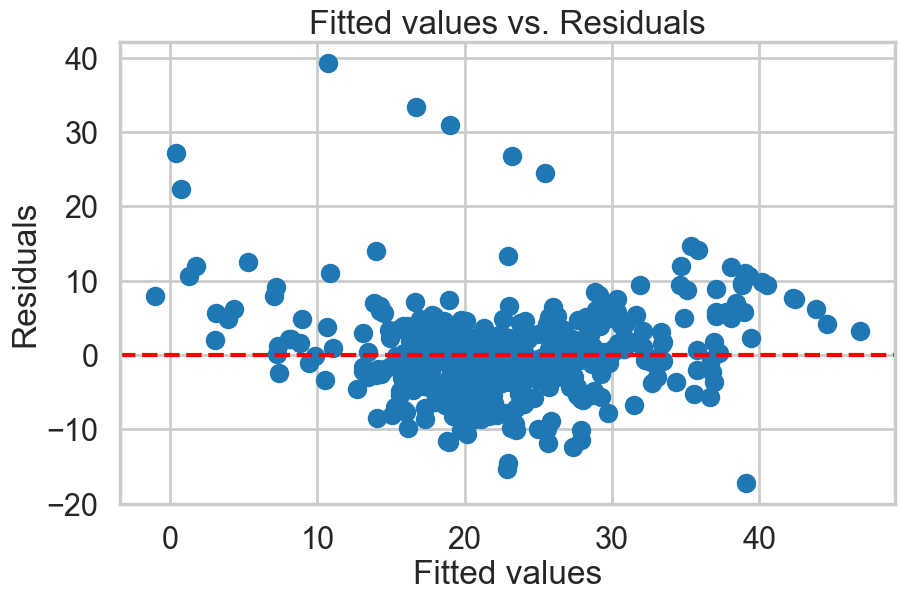

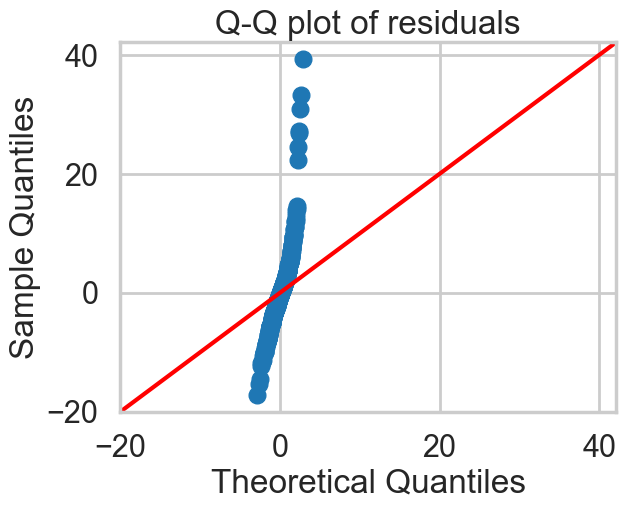

In [53]:
# Fitted values vs. residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Quantile plot of residuals
fig = sm.qqplot(model.resid, line='45')
plt.title('Q-Q plot of residuals')
plt.show()

The fitted values vs. residuals plot tells us about the homoscedasticity assumption and potential non-linear relationships.  In this plot, we're looking for a random scatter of points around the horizontal line at y=0.  Seeing patterns or a funnel shape might indicate violations of model assumptions.  The quantile plot of residuals helps us assess the normality of the residuals.  If the residuals are normally distributed, the points should roughly follow the diagonal line.  Advantages of the Fitted vs. Residual plot is that it helps detect non-linearity and heteroscedasticity; can reveal outliers or influential points, and the disadvantages are that it doesn't directly show if residuals are distributed normally.  The advantages of the quantile plot is that it clearly shows deviations from normality and is easy to interpret for normality assumption.  Patterns related to fitted values, however, do not show, and it is less effective for detecting heteroscedasticity.  Both plots complement each other and provide a comprehensive view of model diagnostics when paired.

Based on the fitted values vs. residuals plot, we can identify several outliers in the model. These are points that deviate significantly from the main cluster of residuals, particularly those with large positive or negative residual values.  There are a few properties with significantly higher actual prices than our model predicts. These could be luxury homes in exceptionally desirable locations, perhaps with breathtaking views of the Charles River or historic significance that adds immense value beyond just their physical characteristics.  Some are priced much lower than our model anticipates. These might represent homes in areas undergoing rapid transition, perhaps in neighborhoods facing temporary challenges or awaiting major development projects that could boost future values.

One particularly interesting outlier could be a property in a traditionally working-class neighborhood that's on the cusp of gentrification. While our model, based on current crime rates and school quality, might predict a lower value, savvy buyers or developers might be willing to pay a premium for its future potential.  Another outlier might represent a spacious home in an area with higher crime rates. Despite the neighborhood challenges, the house's size and quality might make it an attractive option for large families or for use as a group home, commanding a higher price than typical for the area.  These outliers remind us that the Boston housing market is diverse and complex, with each property telling its own unique story. They highlight the importance of considering factors beyond just the numbers when evaluating real estate in this dynamic urban environment.

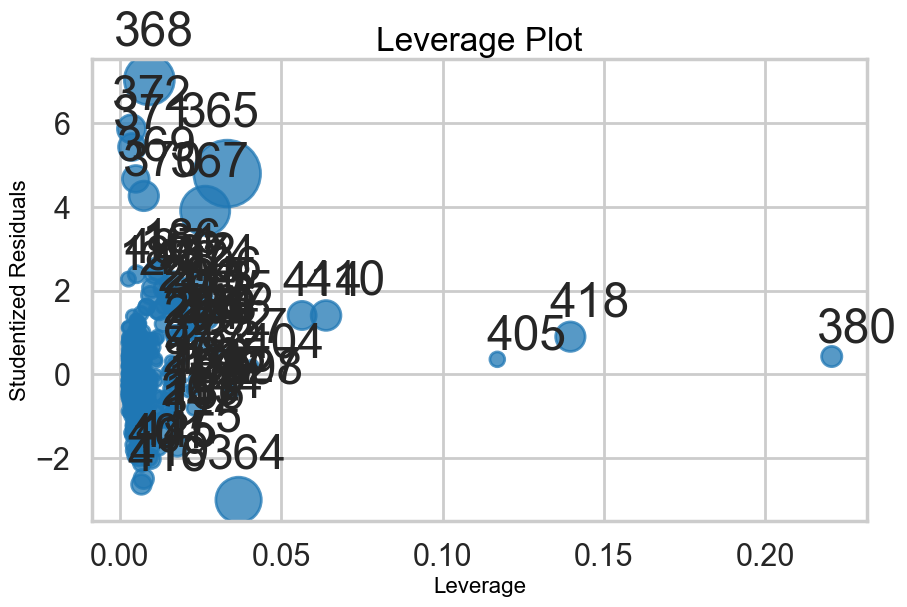

In [54]:
#Leverage Plot
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
plt.title('Leverage Plot')
plt.show()

In our exploration of the Boston housing market, we've uncovered some intriguing properties that wield significant influence over our pricing model. These high leverage points represent homes or neighborhoods with unique characteristics that set them apart from the typical Boston property.  A high leverage point might represent a sprawling estate in a typically modest neighborhood. This property's unusually large number of rooms compared to its surroundings could make it a standout in our model, pulling the relationship between room count and price more strongly in its direction.  Another influential point could be a home in an area with an exceptionally low pupil-teacher ratio. Perhaps it's near a prestigious private school or in a district known for its small class sizes. This educational advantage might drive its price far above what we'd expect based on other factors, giving it high leverage in our model.

In [55]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag
cook_distance = influence.cooks_distance[0]

# Set thresholds for outliers and high leverage points
outlier_threshold = 3 * np.std(model.resid)
leverage_threshold = 2 * (model.df_model + 1) / len(model.fittedvalues)
cook_threshold = 4 / len(model.fittedvalues)

# Create a mask for points to keep
mask = (np.abs(model.resid) < outlier_threshold) & \
       (leverage < leverage_threshold) & \
       (cook_distance < cook_threshold)

bos_clean = bos.loc[mask]
model_clean = ols('MEDV ~ CRIM + RM + PTRATIO', data=bos_clean).fit()
print(model_clean.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     345.6
Date:                Wed, 11 Sep 2024   Prob (F-statistic):          4.71e-115
Time:                        14:49:47   Log-Likelihood:                -1212.8
No. Observations:                 442   AIC:                             2434.
Df Residuals:                     438   BIC:                             2450.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8682      3.385     -3.211      0.0

Based on the OLS Regression Results above, The R^2 value 0.703 indicates that approximately 70.3% of the variance in median home value (MEDV) is explained by the model.  This is substantial improvement from the previous model, suggesting that outlier removal and high leverage points has increased the model's explanatory power.  The adjusted R^2 of 0.701 is very close to the R^2, which means the model is not overfitting and the additional variables are contributing in a meaningful way to explain variance.  The F-statistic of 345.6 with a very low p-value of 4.71e-115 is confirmation that the model as a whole is statistically significant.  AIC and BIC values provide measures of model fit and can be used for model comparison.  This cleaned model appears to be a stronger fit for the data.